In [1]:
print("Hello World")

Hello World


In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
warnings.filterwarnings('ignore')

In [3]:
DATASET_PATH='/Users/lokeshnagasaidarla/Developer/webdev/sleep-health-cardio-prediction/sleep-health-detection/dataset/'
df = pd.read_csv(os.path.join(DATASET_PATH, "preprocessed_data.csv"))

In [4]:
# Split the data into features and target variable
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create and fit KNN model
knn_model = KNeighborsClassifier(n_neighbors=10)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [6]:
# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [7]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


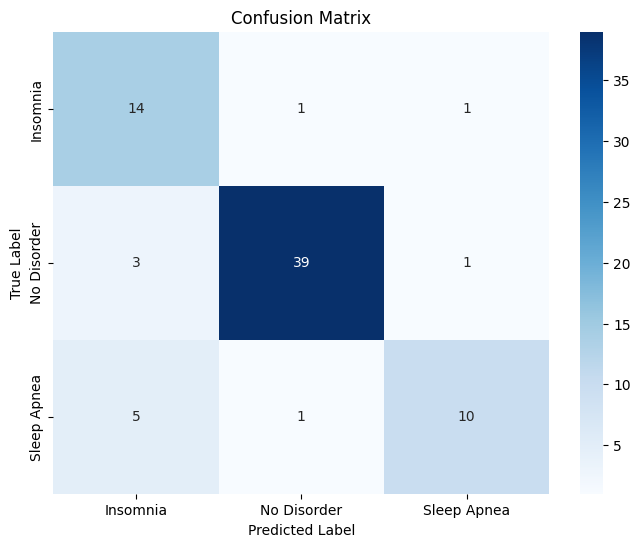

In [8]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)  # Use output_dict for better formatting
conf_matrix = confusion_matrix(y_test, y_pred)

report_df = pd.DataFrame(report).transpose()

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [9]:
single_input = X_test.iloc[0].values.reshape(1, -1)  # Reshape for a single sample

# Find the top 10 neighbors
distances, indices = knn_model.kneighbors(single_input, n_neighbors=10)

# Get the neighbor details
neighbor_df = pd.DataFrame({
    'Neighbor Index': indices.flatten(),
    'Distance': distances.flatten()
})

# Add original feature values for each neighbor (assuming X is the original data)
neighbor_feature_values = X.iloc[indices.flatten()]
neighbor_df = pd.concat([neighbor_df, neighbor_feature_values.reset_index(drop=True)], axis=1)

neighbor_df

,Neighbor Index,Distance,num__Systolic,num__Diastolic,gender__Gender_Male,label_encoder__Occupation,label_encoder__BMI Category,label_encoder__Age Group,remainder__Sleep Duration,remainder__Quality of Sleep,remainder__Physical Activity Level,remainder__Stress Level,remainder__Heart Rate,remainder__Daily Steps
0,146,0.0,0.186944,0.056923,1.0,3.0,0.0,1.0,7.2,8.0,60.0,5.0,68.0,8000.0
1,288,0.0,1.479309,1.682049,0.0,5.0,3.0,3.0,6.0,6.0,90.0,8.0,75.0,10000.0
2,55,0.0,-0.459239,-0.755640,1.0,1.0,0.0,1.0,6.0,6.0,30.0,8.0,72.0,5000.0
3,205,0.0,0.186944,0.056923,1.0,2.0,0.0,2.0,7.7,8.0,90.0,5.0,70.0,8000.0
4,137,0.0,0.186944,0.056923,1.0,3.0,0.0,1.0,7.1,8.0,60.0,5.0,68.0,8000.0
5,140,0.0,-1.751604,-1.568203,0.0,0.0,0.0,1.0,7.1,8.0,60.0,4.0,68.0,7000.0
6,163,0.0,0.186944,0.056923,1.0,3.0,0.0,2.0,7.9,8.0,90.0,5.0,68.0,8000.0
7,33,0.0,-0.459239,-0.755640,1.0,1.0,0.0,1.0,6.1,6.0,30.0,8.0,72.0,5000.0
8,82,0.0,-0.071529,-0.105590,1.0,10.0,3.0,1.0,6.7,7.0,40.0,5.0,70.0,5600.0
9,216,0.0,0.186944,0.056923,1.0,2.0,0.0,2.0,7.8,8.0,90.0,5.0,70.0,8000.0


In [11]:
# Save the model
MODELS_PATH='/Users/lokeshnagasaidarla/Developer/webdev/sleep-health-cardio-prediction/sleep-health-detection/models/'
with open(os.path.join(MODELS_PATH, "knn_model.pkl"), 'wb') as file:
    pickle.dump(knn_model, file)